In [1]:
from functools import partial
from pathlib import Path
from typing import List, Optional
import warnings

from matplotlib import axes
from matplotlib import patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.path
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [2]:
from src.pybaseballstats.plotting import plot_stadium

<Axes: title={'center': 'generic'}>

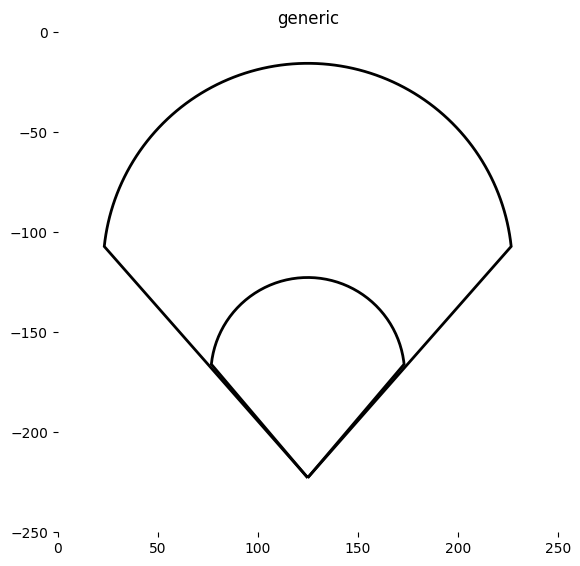

In [3]:
plot_stadium("generic")

In [4]:
import matplotlib.pyplot as plt


def scatter_plot_over_stadium(data, team_stadium):
    base = plot_stadium(team_stadium, width=450, height=500)
    data = data.filter(pl.col("hc_x").is_not_null() & pl.col("hc_y").is_not_null())
    data = data.with_columns(
        [
            (pl.col("hc_y").cast(pl.Float64) * -1).alias("hc_y"),
            pl.col("hc_x").cast(pl.Float64).alias("hc_x"),
        ]
    )
    scatters = []
    scatters.append(
        base.scatter(
            data["hc_x"].to_numpy(),
            data["hc_y"].to_numpy(),
            c="red",
            s=4,
        )
    )
    return base

In [5]:
from src.pybaseballstats.statcast import statcast_single_game

<Axes: title={'center': 'generic'}>

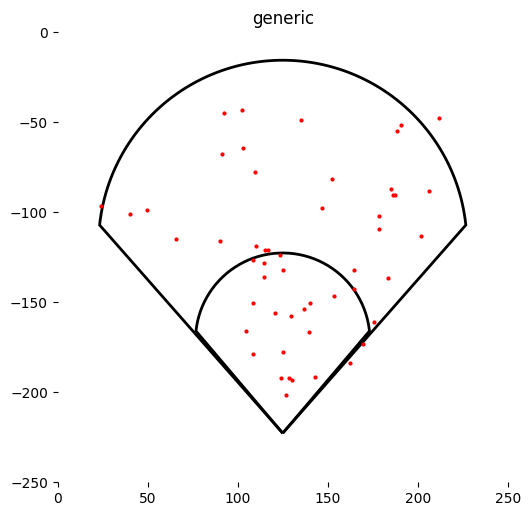

In [6]:
data = statcast_single_game(631614, extra_stats=False).collect()
scatter_plot_over_stadium(data, "generic")

<Axes: >

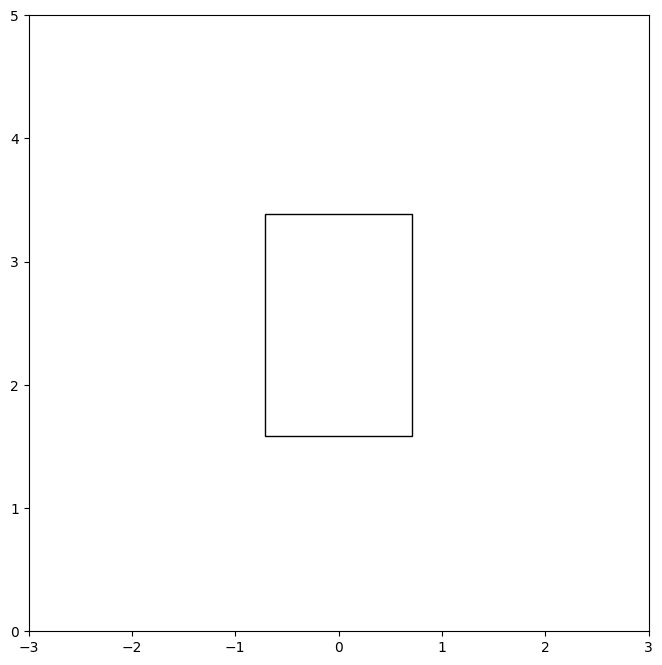

In [7]:
from src.pybaseballstats.plotting import plot_strike_zone, plot_scatter_on_sz

plot_strike_zone()

<Axes: >

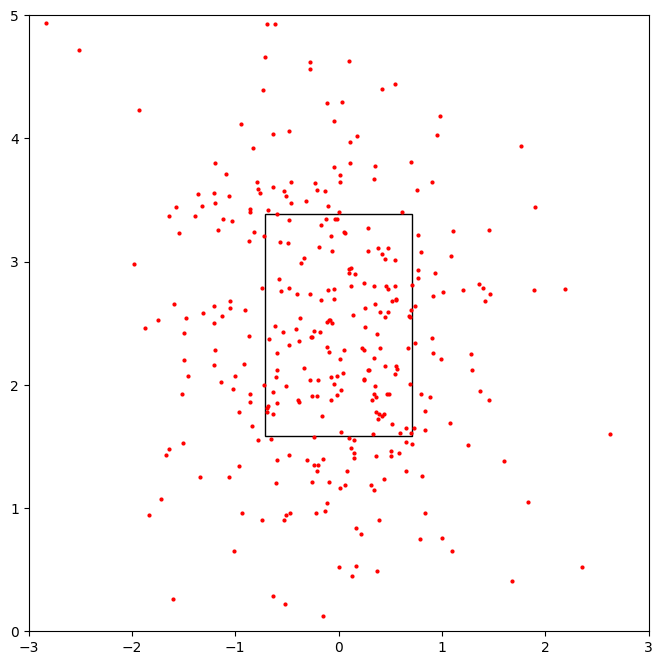

In [8]:
plot_scatter_on_sz(data)